In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("Seasons_stats_complete.csv")

## Inspect the data

In [3]:
df.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,0.0,0.0,0.368,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,0.0,0.0,0.435,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,0.0,0.0,0.394,...,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,0.0,0.0,0.312,...,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,0.0,0.0,0.308,...,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM',
       'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
       'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26063 entries, 0 to 26062
Data columns (total 50 columns):
Unnamed: 0    26063 non-null int64
Year          26063 non-null float64
Player        26063 non-null object
Pos           26063 non-null object
Age           26063 non-null float64
Tm            26063 non-null object
G             26063 non-null float64
MP            26063 non-null float64
PER           26063 non-null float64
TS%           26063 non-null float64
3PAr          26063 non-null float64
FTr           26063 non-null float64
ORB%          26063 non-null float64
DRB%          26063 non-null float64
TRB%          26063 non-null float64
AST%          26063 non-null float64
STL%          26063 non-null float64
BLK%          26063 non-null float64
TOV%          26063 non-null float64
USG%          26063 non-null float64
OWS           26063 non-null float64
DWS           26063 non-null float64
WS            26063 non-null float64
WS/48         26063 non-null float64
OBPM    

In [6]:
# Convert column 'Year' to INT

df.Year = df.Year.astype(int)
df.Age = df.Age.astype(int)
df.MP = df.MP.astype(int)

In [7]:
df.Pos.unique()

array(['G-F', 'SG', 'SF', 'F', 'G', 'F-C', 'PG', 'F-G', 'C', 'PF', 'C-F',
       '0', 'SF-PG'], dtype=object)

## Need to cleanup the positions. Just want C, PF, SF, SG, PG

In [8]:
# Need to cleanup the positions. Just want C, PF, SF, SG, PG

df.groupby(['Pos']).count()

,Unnamed: 0,Year,Player,Age,Tm,G,MP,PER,TS%,3PAr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
0,67,67,67,67,67,67,67,67,67,67,...,67,67,67,67,67,67,67,67,67,67
C,5041,5041,5041,5041,5041,5041,5041,5041,5041,5041,...,5041,5041,5041,5041,5041,5041,5041,5041,5041,5041
C-F,35,35,35,35,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
F,123,123,123,123,123,123,123,123,123,123,...,123,123,123,123,123,123,123,123,123,123
F-C,81,81,81,81,81,81,81,81,81,81,...,81,81,81,81,81,81,81,81,81,81
F-G,60,60,60,60,60,60,60,60,60,60,...,60,60,60,60,60,60,60,60,60,60
G,139,139,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
G-F,79,79,79,79,79,79,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
PF,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289,...,5289,5289,5289,5289,5289,5289,5289,5289,5289,5289


## Inspect the position '0'

In [9]:
position_zero = df[df.Pos == '0']

In [10]:
position_zero.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
312,312,0,0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
487,487,0,0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,618,0,0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
779,779,0,0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
911,911,0,0,0,0,0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Found out that where 'Pos' == '0' are blank values
### Will need to delete these rows

In [11]:
df.sort_values('Pos')

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
9107,9107,0,0,0,0,0,0.0,0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1128,1128,0,0,0,0,0,0.0,0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,618,0,0,0,0,0,0.0,0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3068,3068,0,0,0,0,0,0.0,0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13413,13413,0,0,0,0,0,0.0,0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18104,18104,2006,Alex Scales,SG,27,SAS,1.0,0,0.0,0.000,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18102,18102,2006,Melvin Sanders,SG,25,SAS,16.0,113,10.5,0.548,...,0.700,4.0,19.0,23.0,3.0,5.0,0.0,8.0,20.0,41.0
18100,18100,2006,John Salmons,SG,26,PHI,82.0,2059,10.7,0.508,...,0.775,48.0,172.0,220.0,223.0,73.0,13.0,125.0,178.0,619.0
7599,7599,1985,Butch Carter,SG,26,NYK,69.0,1279,11.5,0.512,...,0.813,36.0,59.0,95.0,167.0,57.0,5.0,109.0,151.0,548.0


In [12]:
new_df = df[df['Pos']!='0']

In [13]:
new_df.sort_values('Pos')

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
26062,707,2019,Ivica Zubac,C,21,LAC,26.0,524,18.3,0.574,...,0.733,61.0,139.0,200.0,38.0,10.0,24.0,37.0,64.0,244.0
12966,12966,1997,Bison Dele,C,27,CHI,9.0,138,13.7,0.453,...,0.733,14.0,19.0,33.0,12.0,3.0,5.0,11.0,20.0,63.0
12969,12969,1997,Vlade Divac,C,28,CHH,81.0,2840,17.9,0.533,...,0.683,241.0,484.0,725.0,301.0,103.0,180.0,193.0,277.0,1024.0
12972,12972,1997,Greg Dreiling,C,34,DAL,40.0,389,7.3,0.466,...,0.407,19.0,57.0,76.0,11.0,8.0,7.0,9.0,65.0,80.0
12975,12975,1997,Kevin Duckworth,C,32,LAC,26.0,384,6.1,0.473,...,0.688,23.0,37.0,60.0,16.0,9.0,11.0,33.0,63.0,104.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,8493,1987,Jeff Malone,SG,25,WSB,80.0,2763,17.0,0.518,...,0.885,50.0,168.0,218.0,298.0,75.0,13.0,182.0,154.0,1758.0
2638,2638,1968,Tom Van,SG,24,TOT,77.0,1514,10.6,0.465,...,0.746,0.0,0.0,225.0,155.0,0.0,0.0,0.0,202.0,610.0
2637,2637,1968,Dick Van,SG,24,NYK,78.0,2348,11.7,0.491,...,0.670,0.0,0.0,424.0,230.0,0.0,0.0,0.0,225.0,859.0
21623,21623,2012,Greivis Vasquez,SG,25,NOH,66.0,1706,14.2,0.513,...,0.821,23.0,150.0,173.0,359.0,60.0,8.0,148.0,126.0,589.0


## Clean up the 'Pos' column

In [14]:
# Replace the following:
# C-F with PF, 
# F with PF, 
# F-C with PF, 
# F-G with SF, 
# G-F with SF, 
# SF-PG with SG

replace_pos_values = {'C-F':'PF', 'F':'PF','F-C':'PF','F-G':'SF','G-F':'SF' ,'SF-PG':'SG','G':'PG' }

In [15]:
new_df = new_df.replace({'Pos': replace_pos_values})

In [16]:
# Check to see if replace

new_df.groupby(['Pos']).count()

,Unnamed: 0,Year,Player,Age,Tm,G,MP,PER,TS%,3PAr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Pos,,,,,,,,,,,,,,,,,,,,,
C,5041,5041,5041,5041,5041,5041,5041,5041,5041,5041,...,5041,5041,5041,5041,5041,5041,5041,5041,5041,5041
PF,5528,5528,5528,5528,5528,5528,5528,5528,5528,5528,...,5528,5528,5528,5528,5528,5528,5528,5528,5528,5528
PG,5098,5098,5098,5098,5098,5098,5098,5098,5098,5098,...,5098,5098,5098,5098,5098,5098,5098,5098,5098,5098
SF,5127,5127,5127,5127,5127,5127,5127,5127,5127,5127,...,5127,5127,5127,5127,5127,5127,5127,5127,5127,5127
SG,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202,...,5202,5202,5202,5202,5202,5202,5202,5202,5202,5202


In [17]:
new_df.head(15)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950,Curly Armstrong,SF,31,FTW,63.0,0,0.0,0.368,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
1,1,1950,Cliff Barker,SG,29,INO,49.0,0,0.0,0.435,...,0.708,0.0,0.0,0.0,109.0,0.0,0.0,0.0,99.0,279.0
2,2,1950,Leo Barnhorst,SF,25,CHS,67.0,0,0.0,0.394,...,0.698,0.0,0.0,0.0,140.0,0.0,0.0,0.0,192.0,438.0
3,3,1950,Ed Bartels,PF,24,TOT,15.0,0,0.0,0.312,...,0.559,0.0,0.0,0.0,20.0,0.0,0.0,0.0,29.0,63.0
4,4,1950,Ed Bartels,PF,24,DNN,13.0,0,0.0,0.308,...,0.548,0.0,0.0,0.0,20.0,0.0,0.0,0.0,27.0,59.0
5,5,1950,Ed Bartels,PF,24,NYK,2.0,0,0.0,0.376,...,0.667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
6,6,1950,Ralph Beard,PG,22,INO,60.0,0,0.0,0.422,...,0.762,0.0,0.0,0.0,233.0,0.0,0.0,0.0,132.0,895.0
7,7,1950,Gene Berce,SF,23,TRI,3.0,0,0.0,0.275,...,0.000,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,10.0
8,8,1950,Charlie Black,PF,28,TOT,65.0,0,0.0,0.346,...,0.651,0.0,0.0,0.0,163.0,0.0,0.0,0.0,273.0,661.0
9,9,1950,Charlie Black,PF,28,FTW,36.0,0,0.0,0.362,...,0.632,0.0,0.0,0.0,75.0,0.0,0.0,0.0,140.0,382.0


In [18]:
new_df.drop(columns='Unnamed: 0', axis=1, inplace=True)

## Why do players with 0 minutes played have predictor values? They might affect the model. I will remove these rows

In [19]:
new_df.sort_values('MP')

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950,Curly Armstrong,SF,31,FTW,63.0,0,0.0,0.368,0.0,...,0.705,0.0,0.0,0.0,176.0,0.0,0.0,0.0,217.0,458.0
336,1951,Gerry Calabrese,SG,25,SYR,46.0,0,0.0,0.426,0.0,...,0.693,0.0,0.0,65.0,65.0,0.0,0.0,0.0,80.0,201.0
335,1951,Tommy Byrnes,SF,27,TRI,19.0,0,0.0,0.379,0.0,...,0.724,0.0,0.0,33.0,32.0,0.0,0.0,0.0,33.0,87.0
334,1951,Tommy Byrnes,SF,27,WSC,12.0,0,0.0,0.260,0.0,...,0.519,0.0,0.0,11.0,16.0,0.0,0.0,0.0,20.0,40.0
333,1951,Tommy Byrnes,SF,27,BLB,16.0,0,0.0,0.401,0.0,...,0.714,0.0,0.0,27.0,21.0,0.0,0.0,0.0,28.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,1966,Wilt Chamberlain*,C,29,PHI,79.0,3737,28.3,0.547,0.0,...,0.513,0.0,0.0,1943.0,414.0,0.0,0.0,0.0,171.0,2649.0
1593,1961,Wilt Chamberlain*,C,24,PHW,79.0,3773,27.8,0.519,0.0,...,0.504,0.0,0.0,2149.0,148.0,0.0,0.0,0.0,130.0,3033.0
1827,1963,Wilt Chamberlain*,C,26,SFW,80.0,3806,31.8,0.550,0.0,...,0.593,0.0,0.0,1946.0,275.0,0.0,0.0,0.0,136.0,3586.0
2507,1968,Wilt Chamberlain*,C,31,PHI,82.0,3836,24.7,0.557,0.0,...,0.380,0.0,0.0,1952.0,702.0,0.0,0.0,0.0,160.0,1992.0


In [20]:
MP_df = new_df[new_df['MP']==0]

### Only need to remove 491 rows

In [21]:
MP_df.count()

Year      491
Player    491
Pos       491
Age       491
Tm        491
G         491
MP        491
PER       491
TS%       491
3PAr      491
FTr       491
ORB%      491
DRB%      491
TRB%      491
AST%      491
STL%      491
BLK%      491
TOV%      491
USG%      491
OWS       491
DWS       491
WS        491
WS/48     491
OBPM      491
DBPM      491
BPM       491
VORP      491
FG        491
FGA       491
FG%       491
3P        491
3PA       491
3P%       491
2P        491
2PA       491
2P%       491
eFG%      491
FT        491
FTA       491
FT%       491
ORB       491
DRB       491
TRB       491
AST       491
STL       491
BLK       491
TOV       491
PF        491
PTS       491
dtype: int64

In [22]:
new_df = new_df[new_df['MP']!=0]

In [23]:
new_df

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
488,1952,Paul Arizin*,SF,23,PHW,66.0,2939,25.5,0.546,0.0,...,0.818,0.0,0.0,745.0,170.0,0.0,0.0,0.0,250.0,1674.0
489,1952,Cliff Barker,SG,31,INO,44.0,494,10.8,0.343,0.0,...,0.588,0.0,0.0,81.0,70.0,0.0,0.0,0.0,56.0,126.0
490,1952,Don Barksdale*,PF,28,BLB,62.0,2014,15.8,0.409,0.0,...,0.691,0.0,0.0,601.0,137.0,0.0,0.0,0.0,230.0,781.0
491,1952,Leo Barnhorst,SF,27,INO,66.0,2344,15.9,0.419,0.0,...,0.652,0.0,0.0,430.0,255.0,0.0,0.0,0.0,196.0,820.0
492,1952,Elmer Behnke,C,22,MLH,4.0,55,7.8,0.319,0.0,...,0.571,0.0,0.0,17.0,4.0,0.0,0.0,0.0,13.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26058,2019,Tyler Zeller,C,29,MEM,4.0,82,19.4,0.640,0.0,...,0.778,9.0,9.0,18.0,3.0,1.0,3.0,4.0,16.0,46.0
26059,2019,Ante Žižić,C,22,CLE,59.0,1082,16.2,0.590,0.0,...,0.705,108.0,212.0,320.0,53.0,13.0,22.0,61.0,113.0,459.0
26060,2019,Ivica Zubac,C,21,TOT,59.0,1040,18.9,0.604,0.0,...,0.802,115.0,247.0,362.0,63.0,14.0,51.0,70.0,137.0,525.0
26061,2019,Ivica Zubac,C,21,LAL,33.0,516,19.5,0.633,0.0,...,0.864,54.0,108.0,162.0,25.0,4.0,27.0,33.0,73.0,281.0


In [24]:
new_df.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'MP', 'PER', 'TS%', '3PAr',
       'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%',
       'OWS', 'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

## Get new DataFrame post 1980 where the 3Pointer was introduced 

In [25]:
Three_point_era_df = new_df[new_df['3PA'] != 0]
Three_point_era_df

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5727,1980,Kareem Abdul-Jabbar*,C,32,LAL,82.0,3143,25.3,0.639,0.001,...,0.765,190.0,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0
5728,1980,Tom Abernethy,PF,25,GSW,67.0,1222,11.0,0.511,0.003,...,0.683,62.0,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0
5729,1980,Alvan Adams,C,25,PHO,75.0,2168,19.2,0.571,0.002,...,0.797,158.0,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0
5730,1980,Tiny Archibald*,PG,31,BOS,80.0,2864,15.3,0.574,0.023,...,0.830,59.0,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0
5732,1980,Gus Bailey,SG,28,WSB,20.0,180,9.3,0.467,0.029,...,0.385,6.0,22.0,28.0,26.0,7.0,4.0,11.0,18.0,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,2019,Thaddeus Young,PF,30,IND,81.0,2489,16.2,0.569,0.174,...,0.644,192.0,331.0,523.0,204.0,123.0,36.0,123.0,194.0,1024.0
26054,2019,Trae Young,PG,20,ATL,81.0,2503,17.0,0.539,0.384,...,0.829,64.0,237.0,301.0,653.0,72.0,15.0,308.0,140.0,1549.0
26055,2019,Cody Zeller,C,26,CHO,49.0,1243,17.2,0.611,0.064,...,0.787,110.0,223.0,333.0,102.0,38.0,41.0,62.0,164.0,497.0
26056,2019,Tyler Zeller,C,29,TOT,6.0,93,17.3,0.607,0.033,...,0.778,11.0,13.0,24.0,4.0,1.0,3.0,4.0,20.0,46.0


In [26]:
Three_point_era_df['2PA/FGA%'] = round(Three_point_era_df['2PA'] / Three_point_era_df['FGA'] * 100, 2)
Three_point_era_df['3PA/FGA%'] = round(Three_point_era_df['3PA'] / Three_point_era_df['FGA'] * 100, 2)

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
Three_point_era_df

,Year,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,2PA/FGA%,3PA/FGA%
5727,1980,Kareem Abdul-Jabbar*,C,32,LAL,82.0,3143,25.3,0.639,0.001,...,696.0,886.0,371.0,81.0,280.0,297.0,216.0,2034.0,99.93,0.07
5728,1980,Tom Abernethy,PF,25,GSW,67.0,1222,11.0,0.511,0.003,...,129.0,191.0,87.0,35.0,12.0,39.0,118.0,362.0,99.69,0.31
5729,1980,Alvan Adams,C,25,PHO,75.0,2168,19.2,0.571,0.002,...,451.0,609.0,322.0,108.0,55.0,218.0,237.0,1118.0,99.77,0.23
5730,1980,Tiny Archibald*,PG,31,BOS,80.0,2864,15.3,0.574,0.023,...,138.0,197.0,671.0,106.0,10.0,242.0,218.0,1131.0,97.73,2.27
5732,1980,Gus Bailey,SG,28,WSB,20.0,180,9.3,0.467,0.029,...,22.0,28.0,26.0,7.0,4.0,11.0,18.0,38.0,97.14,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26053,2019,Thaddeus Young,PF,30,IND,81.0,2489,16.2,0.569,0.174,...,331.0,523.0,204.0,123.0,36.0,123.0,194.0,1024.0,82.64,17.36
26054,2019,Trae Young,PG,20,ATL,81.0,2503,17.0,0.539,0.384,...,237.0,301.0,653.0,72.0,15.0,308.0,140.0,1549.0,61.62,38.38
26055,2019,Cody Zeller,C,26,CHO,49.0,1243,17.2,0.611,0.064,...,223.0,333.0,102.0,38.0,41.0,62.0,164.0,497.0,93.62,6.38
26056,2019,Tyler Zeller,C,29,TOT,6.0,93,17.3,0.607,0.033,...,13.0,24.0,4.0,1.0,3.0,4.0,20.0,46.0,96.67,3.33


In [28]:
years = Three_point_era_df['Year'].unique()
print(years)

[1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993
 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007
 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019]


In [29]:
TwoPA_df = Three_point_era_df.groupby(['Year'])['2PA'].sum()
print(TwoPA_df)

Year
1980    160816.0
1981    154509.0
1982    158494.0
1983    168622.0
1984    151328.0
1985    149518.0
1986    153721.0
1987    152367.0
1988    158607.0
1989    169138.0
1990    177084.0
1991    177264.0
1992    173824.0
1993    164533.0
1994    164290.0
1995    145515.0
1996    157792.0
1997    151157.0
1998    160943.0
1999     89325.0
2000    156691.0
2001    158222.0
2002    153891.0
2003    150296.0
2004    158951.0
2005    160792.0
2006    151395.0
2007    149385.0
2008    158858.0
2009    159444.0
2010    161836.0
2011    163810.0
2012    120257.0
2013    150987.0
2014    153655.0
2015    157437.0
2016    150989.0
2017    150055.0
2018    147465.0
2019    153505.0
Name: 2PA, dtype: float64


In [30]:
ThreePA_df = Three_point_era_df.groupby(['Year'])['3PA'].sum()
print(ThreePA_df)

Year
1980     5522.0
1981     4161.0
1982     4655.0
1983     4592.0
1984     4599.0
1985     6008.0
1986     6677.0
1987     9177.0
1988    10735.0
1989    14496.0
1990    15361.0
1991    16587.0
1992    17433.0
1993    20384.0
1994    23031.0
1995    35874.0
1996    41535.0
1997    44011.0
1998    34026.0
1999    20261.0
2000    33792.0
2001    34290.0
2002    37517.0
2003    37101.0
2004    39708.0
2005    43906.0
2006    42898.0
2007    44269.0
2008    48484.0
2009    50535.0
2010    49184.0
2011    52915.0
2012    38277.0
2013    52958.0
2014    58438.0
2015    63420.0
2016    63889.0
2017    73136.0
2018    77797.0
2019    92113.0
Name: 3PA, dtype: float64


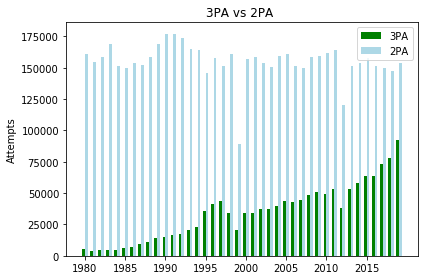

In [49]:
labels = [1980,1985,1990,1995,2000,2005,2010,2015]
Three_point_data = ThreePA_df
Two_point_data = TwoPA_df

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(years-width/2, Three_point_data, width, label='3PA', color='green')
rects2 = ax.bar(years+width/2, Two_point_data, width, label='2PA',color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Attempts')
ax.set_title('3PA vs 2PA ')
ax.set_xticks(labels)
# ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## Create two columns that gets the average 3p and 2p attempt percentages per player by year

In [38]:
ThreePA_percentage = Three_point_era_df.groupby(['Year'])['3PA/FGA%'].mean()

In [39]:
TwoPA_percentage = Three_point_era_df.groupby(['Year'])['2PA/FGA%'].mean()

### Graph shows the decline in the percentage of 2p attempts vs the rise of the 3p attempt percentage

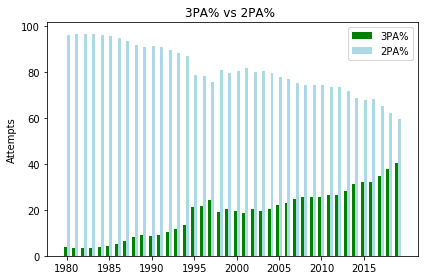

In [51]:
labels = [1980,1985,1990,1995,2000,2005,2010,2015]

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(years-width/2, ThreePA_percentage, width, label='3PA%', color='green')
rects2 = ax.bar(years+width/2, TwoPA_percentage, width, label='2PA%',color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Attempts')
ax.set_title('3PA% vs 2PA% ')
ax.set_xticks(labels)
# ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

## Analyze the trend of 3pa percentage per position C, PF, SF, SG, PG

#### Get 3p data for each position by year

In [58]:
Game_stats_C = round(Three_point_era_df.loc[Three_point_era_df['Pos'] == 'C'].groupby('Year').mean(),2)
Game_stats_PF = round(Three_point_era_df.loc[Three_point_era_df['Pos'] == 'PF'].groupby('Year').mean(),2)
Game_stats_SF = round(Three_point_era_df.loc[Three_point_era_df['Pos'] == 'SF'].groupby('Year').mean(),2)
Game_stats_SG = round(Three_point_era_df.loc[Three_point_era_df['Pos'] == 'SG'].groupby('Year').mean(),2)
Game_stats_PG = round(Three_point_era_df.loc[Three_point_era_df['Pos'] == 'PG'].groupby('Year').mean(),2)

#### Use average 3p attempt percentage from above and plot bar graph showing avg 3p attempt percentages and line graphs for 3pa % for each position

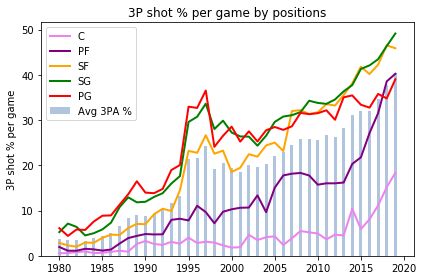

In [78]:
average_bar = plt.bar(years, ThreePA_percentage, width=0.35, label='Avg 3PA %', color='lightsteelblue')
line_C = plt.plot(years, Game_stats_C['3PA/FGA%'], color="violet", label="C", linewidth=2)
line_PF = plt.plot(years, Game_stats_PF['3PA/FGA%'], color="purple", label="PF", linewidth=2)
line_SF = plt.plot(years, Game_stats_SF['3PA/FGA%'], color="orange", label="SF", linewidth=2)
line_SG = plt.plot(years, Game_stats_SG['3PA/FGA%'], color="green", label="SG", linewidth=2)
line_PG = plt.plot(years, Game_stats_PG['3PA/FGA%'], color="red", label="PG", linewidth=2)

plt.legend()

plt.ylabel("3P shot % per game")
plt.legend(loc="best")
plt.title("3P shot % per game by positions")
plt.tight_layout()

## Analyze the trend of 2pa percentage per position C, PF, SF, SG, PG

#### Get 2p data for each position by year

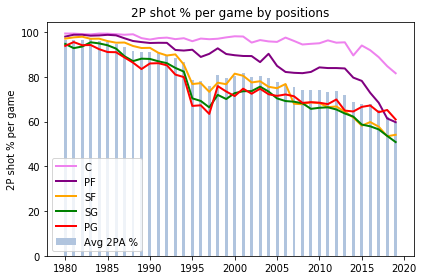

In [84]:
average_bar = plt.bar(years, TwoPA_percentage, width=0.35, label='Avg 2PA %', color='lightsteelblue')
line_C = plt.plot(years, Game_stats_C['2PA/FGA%'], color="violet", label="C", linewidth=2)
line_PF = plt.plot(years, Game_stats_PF['2PA/FGA%'], color="purple", label="PF", linewidth=2)
line_SF = plt.plot(years, Game_stats_SF['2PA/FGA%'], color="orange", label="SF", linewidth=2)
line_SG = plt.plot(years, Game_stats_SG['2PA/FGA%'], color="green", label="SG", linewidth=2)
line_PG = plt.plot(years, Game_stats_PG['2PA/FGA%'], color="red", label="PG", linewidth=2)

plt.legend()

plt.ylabel("2P shot % per game")
plt.legend(loc="best")
plt.title("2P shot % per game by positions")
plt.tight_layout()